In [1]:
import pandas as pd
import numpy as np
import random
import math
import gc
import matplotlib.pylab as plt
import networkx as nx

# Graph Initialization

In [2]:
nodes = 25
adjacency_matrix = np.zeros((nodes,nodes),dtype = np.int)

edge_probability = .0085 if nodes > 100 else 0.09

edges = []
edges_cnt = 0
for i in range(nodes):
    for j in range(i):
        prob = random.random()
        if prob < edge_probability:
            adjacency_matrix[i,j] = 1
            edges.append((i,j))
            edges_cnt += 1
            
adjacency_matrix

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      

In [3]:
G=nx.Graph()
G.add_nodes_from(list(range(0,nodes)))
G.add_edges_from(edges)

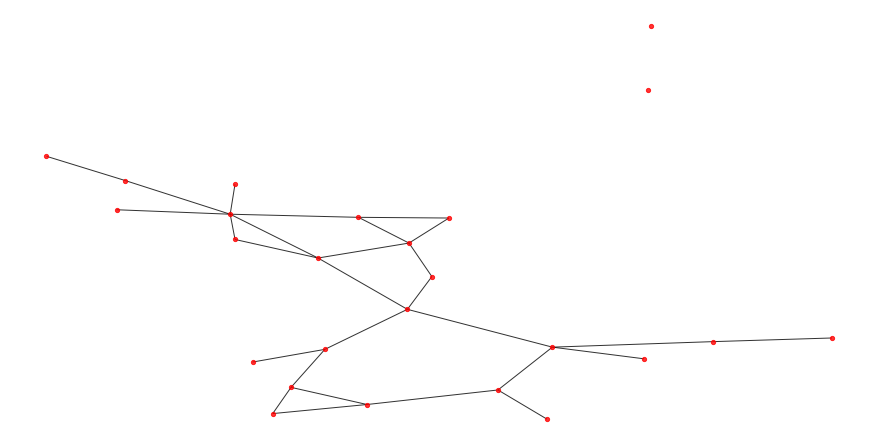

In [4]:
plt.figure(figsize=(12,6))
nx.draw(G,node_color='r', node_size=18, alpha=0.8)
plt.show() # display

# Greedy Algorithm

In [5]:
#Vertex Cover Greedy Algorithm
visited = np.zeros(nodes)
cnt = 0
for e in edges:
    (u,v) = e
#     print(u,v)
    if ((visited[u]==0) & (visited[v]==0)):
        visited[u] = 1
        visited[v] = 1
        cnt+=2

In [6]:
print("Vertex cover consists of {} nodes".format(cnt))

Vertex cover consists of 16 nodes


In [7]:
approximation_algo_result = cnt
approximation_algo_result

16

# Genetic Algorithm

In [8]:
# Init
n = nodes
total_population = 15 #Maximum population allowed in environment
population_init = 10
max_iterations = 50

cross_over_prob = 0.50
mutation_prob = 0.05
    
def chromosomes_generation(n,k,population_init):
    """n: int -> total vertices,
    k: int -> number of vertices in our solution vertex cover,
    popoulation_init: int -> initial population
    
    Description: Randomly initialize population with k vertices as our vertex cover 

    Args:
        n (int): total vertices
        k (int): number of vertices in our solution vertex cover
        population_init (int): initial_population

    Returns:
        List[List[int]]: vertex cover with k vertices
    """
    vertex_cover = []
    for i in range(population_init):
        chromosome = np.zeros(n,dtype=int)
        samples = random.sample(range(n),k=k)
        
        for j in range(k):
            chromosome[samples[j]] = 1
        vertex_cover.append(chromosome)
    return vertex_cover

In [9]:
def cost(soln,edges):
    """
    Description: We use this to measure fitness. Given our vertex cover, we measure how many edges are missed.

    Args:
        soln (List[int]): list of k vertices
        edges (List[Tuple[int]]): list of edges

    Returns:
        int: number of missed edges
    """
    count = 0
    for e in edges:
        (u,v) = e
        if soln[u] == 0 and soln[v] == 0:
            count+=1
    return count

In [10]:
def selection_fittest(vertex_cover,total_population,edges):
    """
    Description: selection basis to pass solutions to next generation.
    This function just selects top performing solutions and passes them on to the next generation

    Args:
        vertex_cover (List[int]): list of k vertices
        total_population (int): total population
        edges (List[Tuple[int]]): list of edges
    """
    score = []
    output_lst = []
    len_vertex_cover = len(vertex_cover)
    
    for i in range(len_vertex_cover):
        score.append(cost(vertex_cover[i],edges))
    sorted_index = np.argsort(score)
    
    for i in range(len_vertex_cover):
        output_lst.append(vertex_cover[sorted_index[i]])
        if i+1 == total_population:
            break
        
    vertex_cover = output_lst
    return vertex_cover, score[sorted_index[0]]

In [11]:
def cross_over_and_mutate(vertex_cover,n,k,mutation_prob,edges):
    """
    Description: Mutation and crosssover step happens here
    """
    new_vertex_cover = vertex_cover.copy()
    len_vertex_cover = len(vertex_cover)
    variations = 1
    
    # Crossover happens here
    
    for i in range(len_vertex_cover):
        #First solution
        parent_1 = vertex_cover[i].copy()
        #Second solution 
        parent_2 = vertex_cover[int(random.uniform(0,len_vertex_cover))] 
        
        parent_1_unique = []
        parent_2_unique = []
        
        # Store the vertices of both solutions
        for j in range(n):
            if parent_1[j] ==1:
                parent_1_unique.append(j)
                
            if parent_2[j] == 1:
                parent_2_unique.append(j)
                
        # Find vertices from parent 1 which are in parent 2 and shuffle
        parent_1_unique =np.setdiff1d(parent_1,parent_2)
        random.shuffle(parent_1_unique)
        
        # Find vertices from parent 2 which are in parent 1 and shuffle
        parent_2_unique =np.setdiff1d(parent_2,parent_1)
        random.shuffle(parent_2_unique)
        
        # Swap half of the unique vertices from parent 2 into parent 1 -> New solution
        swap = math.ceil(cross_over_prob * min(len(parent_1_unique),len(parent_2_unique)))
        for j in range(swap):
              parent_1[parent_2_unique[j]] = 1
              parent_1[parent_2_unique[j]] = 0
              
        #Mutation happens here
        
        zeroes = []
        ones = []
        for j in range(n):
            if parent_1[j] == 1:
                ones.append(j)
            else:
                zeroes.append(j)
                
        random.shuffle(ones)
        random.shuffle(zeroes)
        
        coin_toss = random.random()
        if coin_toss <= 0.5:
            swaps =  min(len(ones),len(zeroes))
            
            for j in range(swaps):
                coin_toss_2 = random.random()
                if coin_toss_2 < mutation_prob:
                    parent_1[ones[j]] = 0
                    parent_1[zeroes[j]] = 1
                    #Swapping logic
                    dummy = ones[j]
                    ones[j] = zeroes[j]
                    zeroes[j] = dummy
        else:
            mutate_lst = []
            for e in edges:
                (u,v) = e
                if((parent_1[u] == 0) and (parent_1[v] == 0)):
                    coin_toss2 = random.random()
                    if(coin_toss2 < mutation_prob):
                        coin_toss3 = random.random()
                        if(coin_toss3 <= 0.5):
                            if(u not in mutate_lst):
                                mutate_lst.append(u)
                        else:
                            if(v not in mutate_lst):
                                mutate_lst.append(v)
            
            random.shuffle(mutate_lst)
            mutated_swaps = min(len(ones),len(mutate_lst))

            for j in range(mutated_swaps):
                parent_1[ones[j]] = 0
                parent_1[mutate_lst[j]] = 1
                #Swapping logic
                dummy = ones[j]
                ones[j] = mutate_lst[j]
                mutate_lst[j] = dummy
        
        new_vertex_cover.append(parent_1)
    return new_vertex_cover
    

In [12]:
def environment(n,k,mutation_prob,population_init,total_population,max_iterations,edges):
    vertex_cover = chromosomes_generation(n,k,population_init)
    for it in range(max_iterations):
        vertex_cover = cross_over_and_mutate(vertex_cover,n,k,mutation_prob,edges)
#         return
        vertex_cover,cost_value = selection_fittest(vertex_cover,total_population,edges)
        if (it%10)==9:
            print("k = {}, Iteration = {}, Cost = {}".format(k,it+1,cost_value))
        if cost_value==0:
            break
    result = []
    soln = vertex_cover[0]
    for j in range(len(soln)):
        if(soln[j] == 1):
            result.append(j)
    print("k = {}, Iteration = {}, Cost = {}\nSoln = {}".format(k,it,cost_value,result))
    return cost_value,result

In [13]:
# For garbage collection
def free_memory():
    gc.collect()

In [14]:
def optimize_for_best_k(n,mutation_prob,population_init,total_population,max_iterations,edges,start,end):
    """
    Description: Perform binary search with k and find out the minimum k to cover all vertices
    """
    result_dict = {}
    l = start
    h = end
    ans = 0
    while(l<=h):
        m = int((l+h)/2)
        cost_value,result = environment(n,m,mutation_prob,population_init,total_population,max_iterations,edges)
        # print("Cost is {} result is {}".format(cost_value,result))
        if(cost_value==0):
            result_dict[m] = result
            h = m-1
        else:
            l = m + 1
    return result_dict


In [15]:
free_memory()
%time result = optimize_for_best_k(n,mutation_prob,population_init,total_population,max_iterations,edges,int(approximation_algo_result/2),n)

k = 16, Iteration = 4, Cost = 0
Soln = [0, 1, 4, 5, 6, 7, 9, 10, 11, 15, 16, 18, 19, 21, 22, 24]
k = 11, Iteration = 10, Cost = 1
k = 11, Iteration = 20, Cost = 1
k = 11, Iteration = 30, Cost = 1
k = 11, Iteration = 40, Cost = 1
k = 11, Iteration = 50, Cost = 1
k = 11, Iteration = 49, Cost = 1
Soln = [1, 2, 3, 6, 8, 9, 11, 13, 19, 22, 24]
k = 13, Iteration = 10, Cost = 0
k = 13, Iteration = 9, Cost = 0
Soln = [0, 4, 5, 6, 7, 8, 9, 11, 12, 18, 19, 21, 22]
k = 12, Iteration = 10, Cost = 1
k = 12, Iteration = 20, Cost = 1
k = 12, Iteration = 26, Cost = 0
Soln = [2, 5, 8, 9, 10, 11, 14, 18, 20, 21, 23, 24]
Wall time: 503 ms


In [16]:
result.keys()

dict_keys([16, 13, 12])

In [17]:
min_key = 0
min_len = 10000000000000000
for key,value in result.items():
    if len(value) < min_len:
        min_key = key
        min_len= len(value)
print(min_len)

12
